In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### 2.1

In [2]:
data = pd.read_csv('week2.csv',index_col = 'Date')
data.head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,AveragePrice,TotalTradedQuantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,0,LALPATHLAB,EQ,891.15,895.0,914.15,881.00,912.00,900.60,889.35,257655,2.291453e+08,15451,174775,67.83,5,2017,0.000000,Slight or No change
2017-05-16,1,LALPATHLAB,EQ,900.60,910.0,925.00,895.05,909.40,910.95,914.57,104896,9.593430e+07,13001,75813,72.27,5,2017,1.149234,Positive
2017-05-17,2,LALPATHLAB,EQ,910.95,913.0,925.00,909.00,912.05,911.70,917.19,72460,6.645960e+07,2802,53829,74.29,5,2017,0.082332,Slight or No change
2017-05-18,3,LALPATHLAB,EQ,911.70,908.0,919.35,903.05,906.00,909.75,914.12,37707,3.446889e+07,2731,24836,65.87,5,2017,-0.213886,Slight or No change
2017-05-19,4,LALPATHLAB,EQ,909.75,917.0,917.00,905.80,910.00,910.25,910.61,81082,7.383375e+07,4430,69926,86.24,5,2017,0.054960,Slight or No change


In [3]:
data.index = data.index.astype('datetime64[ns]')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              494 non-null    int64  
 1   Symbol                  494 non-null    object 
 2   Series                  494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   AveragePrice            494 non-null    float64
 10  TotalTradedQuantity     494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty 

In [5]:
data = data.drop('Unnamed: 0',axis = 1)

In [6]:
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,AveragePrice,TotalTradedQuantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,LALPATHLAB,EQ,891.15,895.0,914.15,881.00,912.00,900.60,889.35,257655,2.291453e+08,15451,174775,67.83,5,2017,0.000000,Slight or No change
2017-05-16,LALPATHLAB,EQ,900.60,910.0,925.00,895.05,909.40,910.95,914.57,104896,9.593430e+07,13001,75813,72.27,5,2017,1.149234,Positive
2017-05-17,LALPATHLAB,EQ,910.95,913.0,925.00,909.00,912.05,911.70,917.19,72460,6.645960e+07,2802,53829,74.29,5,2017,0.082332,Slight or No change
2017-05-18,LALPATHLAB,EQ,911.70,908.0,919.35,903.05,906.00,909.75,914.12,37707,3.446889e+07,2731,24836,65.87,5,2017,-0.213886,Slight or No change
2017-05-19,LALPATHLAB,EQ,909.75,917.0,917.00,905.80,910.00,910.25,910.61,81082,7.383375e+07,4430,69926,86.24,5,2017,0.054960,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,LALPATHLAB,EQ,1024.95,1015.7,1031.95,1006.90,1013.00,1013.10,1020.66,20113,2.052851e+07,3628,11587,57.61,5,2019,-1.156154,Negative
2019-05-08,LALPATHLAB,EQ,1013.10,1014.0,1019.85,1001.90,1002.00,1006.10,1010.90,18048,1.824473e+07,4175,11239,62.27,5,2019,-0.690949,Slight negative
2019-05-09,LALPATHLAB,EQ,1006.10,1014.0,1014.00,977.70,979.90,982.90,987.36,60539,5.977355e+07,8169,37303,61.62,5,2019,-2.305934,Negative


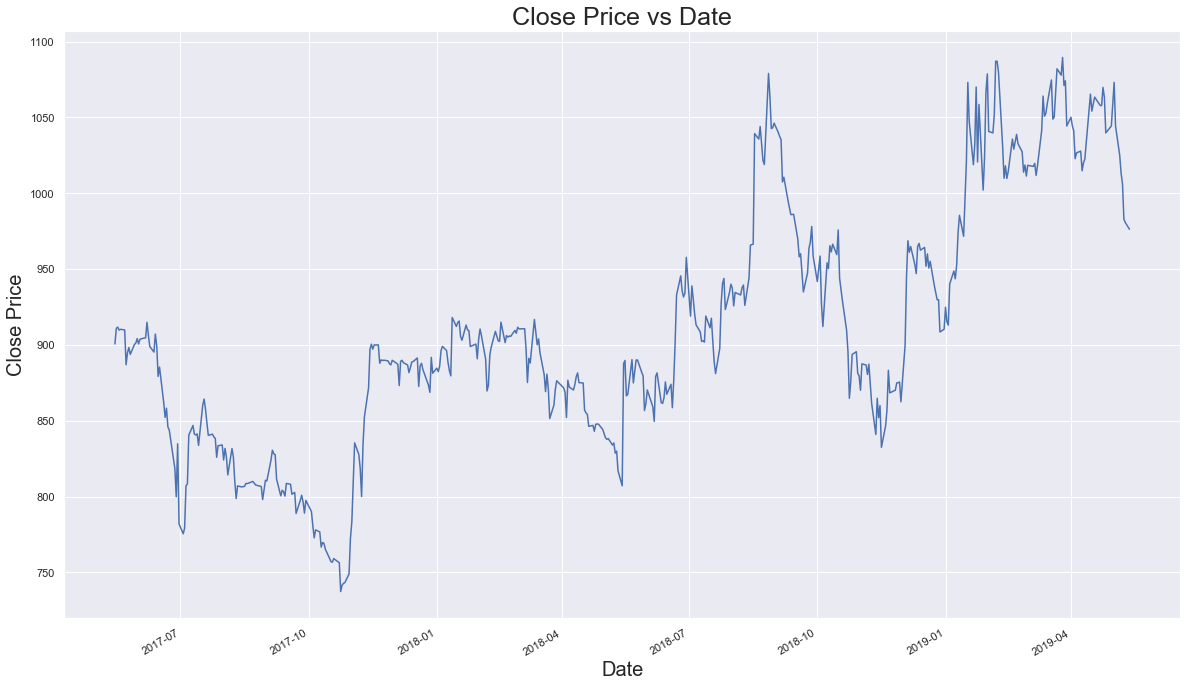

In [7]:
fig,ax = plt.subplots(figsize = (20,12))
ax.plot(data.index,data['Close Price'])
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel("Date",fontsize = 20)
plt.ylabel('Close Price',fontsize = 20)
plt.title("Close Price vs Date",size = 25)
plt.show()

#### 2.2

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


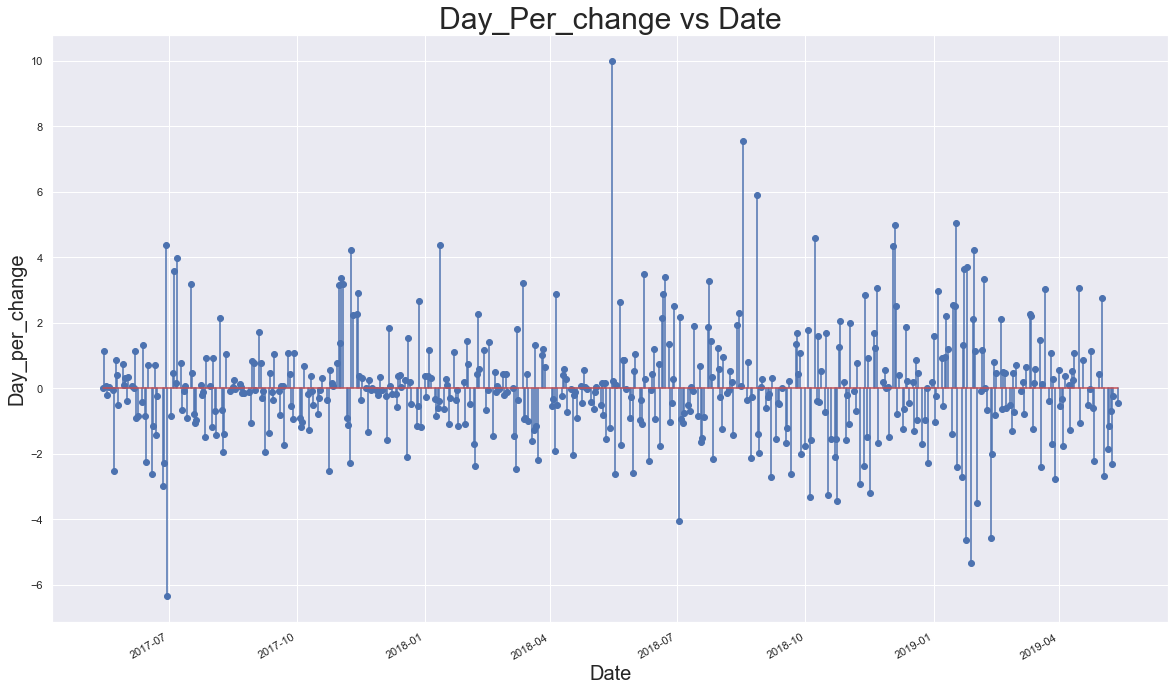

In [8]:
fig,ax = plt.subplots(figsize = (20,12))
ax.stem(data.index,data['Day_Perc_Change'])
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel("Date",fontsize = 20)
plt.ylabel('Day_per_change',fontsize = 20)
plt.title("Day_Per_change vs Date",fontsize =30)
plt.show()

#### 2.3

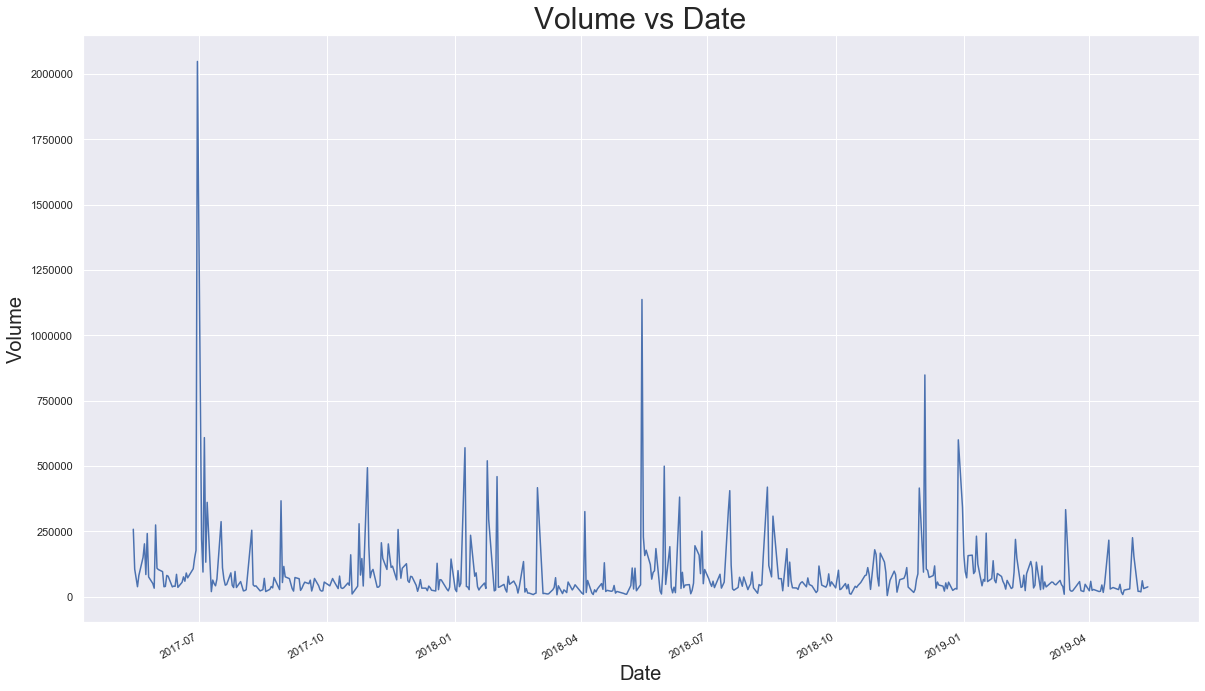

In [9]:
fig,ax = plt.subplots(figsize = (20,12))
ax.plot(data.index,data['TotalTradedQuantity'])
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel("Date",fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.title("Volume vs Date",fontsize =30)
plt.show()

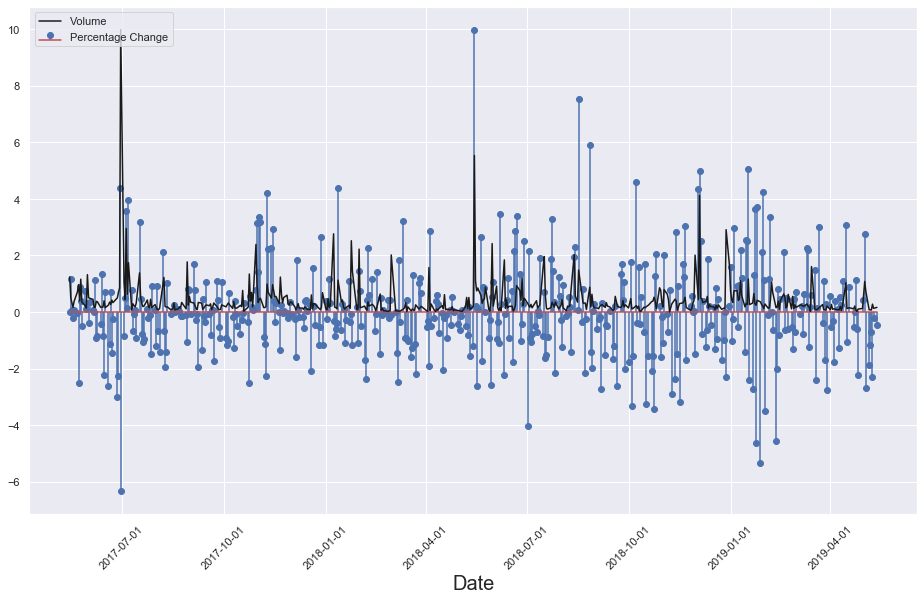

In [10]:
scaledvolume = data['TotalTradedQuantity'] - data['TotalTradedQuantity'].min()
scaledvolume = scaledvolume/scaledvolume.max() * data.Day_Perc_Change.max()

fig,ax = plt.subplots(figsize = (13, 8))

ax.stem(data.index,data.Day_Perc_Change,'b',markerfmt = 'bo',label = 'Percentage Change',use_line_collection = True)
ax.plot(data.index,scaledvolume,'k',label = 'Volume')

ax.set_xlabel('Date',fontsize  = 20)

plt.legend(loc = 2)
plt.tight_layout()
plt.xticks(plt.xticks()[0],rotation = 45)
plt.show()

#### 2.4

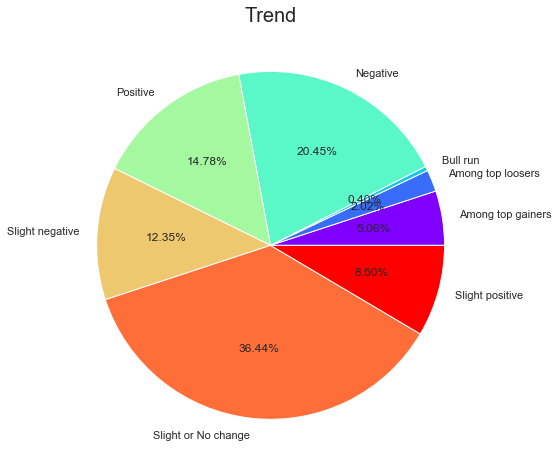

In [11]:
plt.figure(figsize= (15,8))
g = data.groupby('Trend')
g['Trend'].count().plot(kind = 'pie',autopct='%1.2f%%',cmap = 'rainbow',labeldistance = 1.10)
plt.title('Trend',fontsize = 20)
plt.ylabel('')
plt.show()

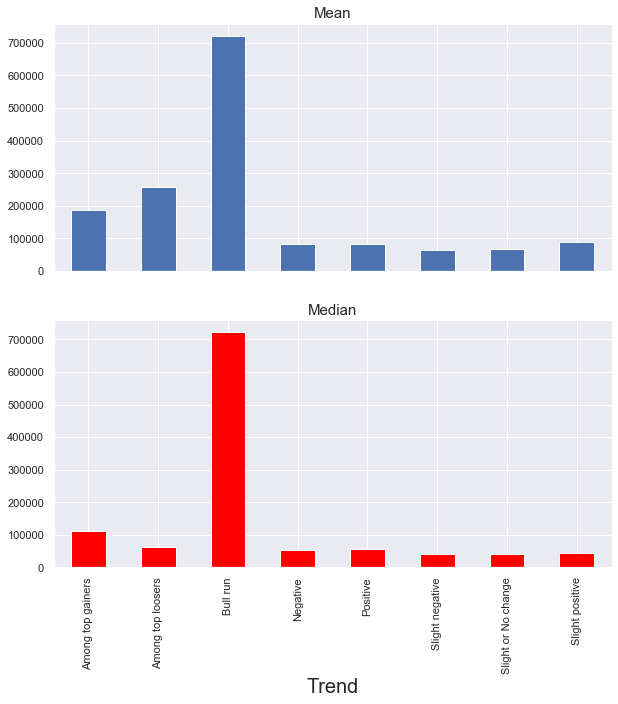

In [12]:
fig ,(ax1,ax2) = plt.subplots(2,1,sharex = True,figsize = (10,10))
g['TotalTradedQuantity'].mean().plot(kind = 'bar',ax = ax1)
g["TotalTradedQuantity"].median().plot(kind = 'bar',ax = ax2,color = 'red')
ax1.set_title('Mean',fontsize = 15)
ax2.set_title('Median',fontsize = 15)
ax2.set_xlabel('Trend',fontsize = 20)
plt.show()

#### 2.5

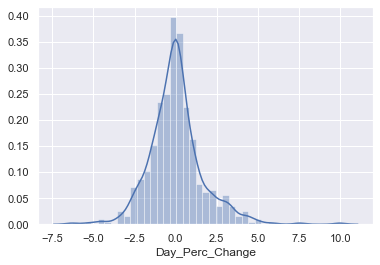

In [13]:
sns.distplot(data.Day_Perc_Change)

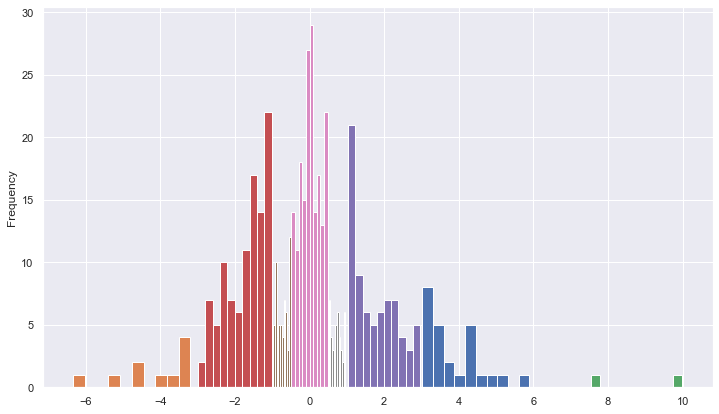

In [14]:
plt.figure(figsize = (12,7))
g['Day_Perc_Change'].plot(kind = 'hist')
plt.show()

#### 2.6

In [15]:
Ashoka = pd.read_csv("C:\\Users\\HP\Desktop\\Machine learning\\Projects\\Stock Price prediction\\Dataset\\Small_Cap\\ASHOKA.csv")
Bajaj = pd.read_csv("C:\\Users\\HP\Desktop\\Machine learning\\Projects\\Stock Price prediction\\Dataset\\Small_Cap\\BAJAJELEC.csv")
Idfc = pd.read_csv("C:\\Users\\HP\Desktop\\Machine learning\\Projects\\Stock Price prediction\\Dataset\\Small_Cap\\IDFC.csv")
Pvr = pd.read_csv("C:\\Users\\HP\Desktop\\Machine learning\\Projects\\Stock Price prediction\\Dataset\\Small_Cap\\PVR.csv")
Raymond = pd.read_csv("C:\Users\HP\Desktop\Machine learning\Projects\Stock Price prediction\Dataset\Small_Cap\\RAYMOND.csv")

In [16]:
Ashoka = Ashoka[Ashoka['Series']=='EQ']
Bajaj = Bajaj[Bajaj['Series']=='EQ']
Idfc = Idfc[Idfc['Series']=='EQ']
Pvr = Pvr[Pvr['Series']=='EQ']
Raymond = Raymond[Raymond['Series']=='EQ']

In [17]:
close_price = pd.DataFrame()
close_price['Ashoka'] = Ashoka['Close Price']
close_price['Bajaj'] = Bajaj['Close Price']
close_price['Idfc'] = Idfc['Close Price']
close_price['Pvr'] = Pvr['Close Price']
close_price['Raymond'] = Raymond['Close Price']
close_price

,Ashoka,Bajaj,Idfc,Pvr,Raymond
0,216.05,341.15,63.70,1524.95,772.80
1,214.90,347.00,64.25,1539.00,785.00
2,217.00,349.85,63.35,1530.30,783.65
3,209.65,334.10,61.50,1515.05,746.95
4,206.25,336.20,61.15,1513.55,723.10
...,...,...,...,...,...
489,118.10,557.75,37.75,1802.30,808.95
490,115.45,534.45,37.10,1780.10,807.10
491,115.30,531.85,37.60,1748.50,805.30
492,117.45,540.90,37.60,1758.45,804.40


In [18]:
Dayperchange = pd.DataFrame()
for i in close_price.columns:
    Dayperchange[i] = close_price[i].pct_change()*100
    Dayperchange[i] = Dayperchange[i].fillna(0)
Dayperchange

,Ashoka,Bajaj,Idfc,Pvr,Raymond
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.532284,1.714788,0.863422,0.921342,1.578675
2,0.977199,0.821326,-1.400778,-0.565302,-0.171975
3,-3.387097,-4.501929,-2.920284,-0.996537,-4.683213
4,-1.621751,0.628554,-0.569106,-0.099007,-3.192985
...,...,...,...,...,...
489,1.766480,-0.017926,-3.329065,-0.320779,0.359779
490,-2.243861,-4.177499,-1.721854,-1.231759,-0.228692
491,-0.129926,-0.486481,1.347709,-1.775181,-0.223021
492,1.864701,1.701608,0.000000,0.569059,-0.111760


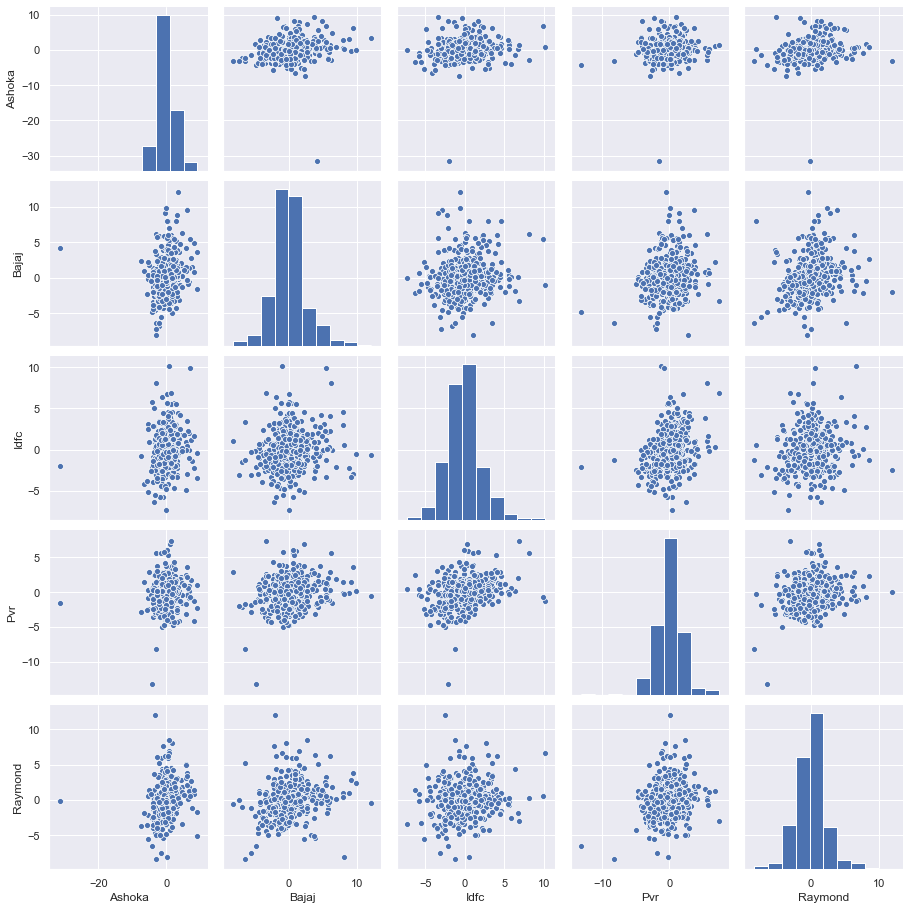

In [19]:
sns.pairplot(Dayperchange)
plt.show()

#### 2.7

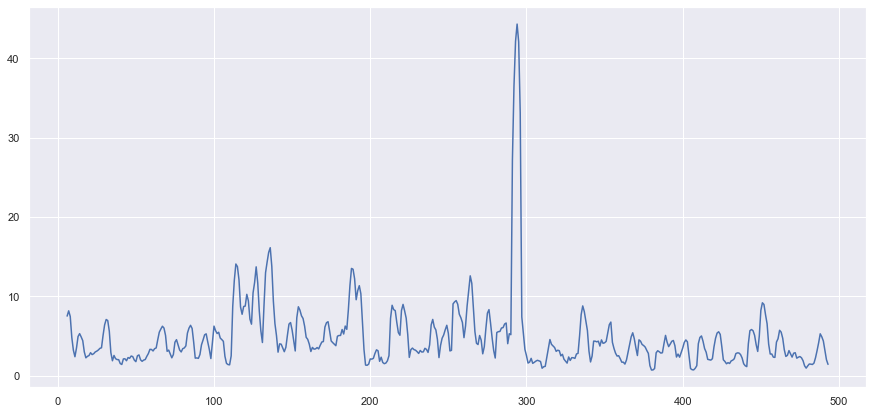

In [20]:
plt.figure(figsize = (15,7))
Dayperchange['A_rolling_average'] = close_price.Ashoka.rolling(7).std()
Dayperchange["A_rolling_average"].plot()
plt.show()

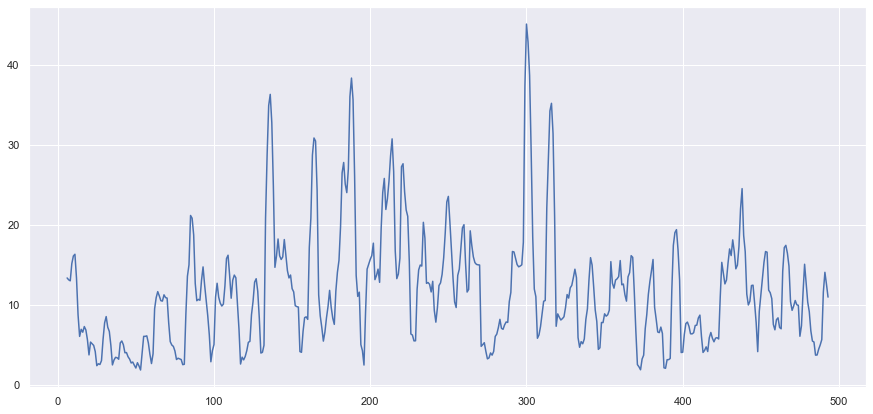

In [21]:
plt.figure(figsize = (15,7))
Dayperchange['B_rolling_average'] = close_price.Bajaj.rolling(7).std(ddof = 0)
Dayperchange['B_rolling_average'].plot()
plt.show()

#### 2.9

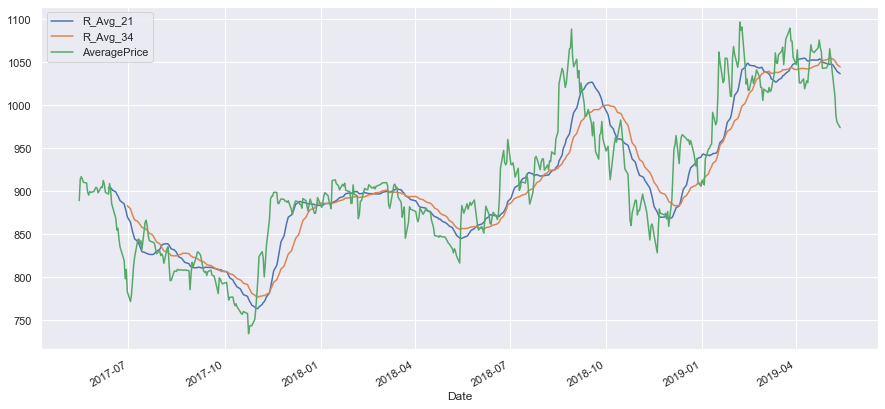

In [22]:
data["R_Avg_21"] = data["AveragePrice"].rolling(21).mean()
data["R_Avg_34"] = data["AveragePrice"].rolling(34).mean()
data[['R_Avg_21','R_Avg_34','AveragePrice']].plot(figsize = (15,7))

#### 2.10

In [23]:
data['Average'] = data['Close Price'].rolling(14).mean()
data['std14'] = data['Close Price'].rolling(14).std()

data['upper_band'] = data['Average'] + (data['std14']*2)
data['lower_band'] = data['Average'] - (data['std14']*2)

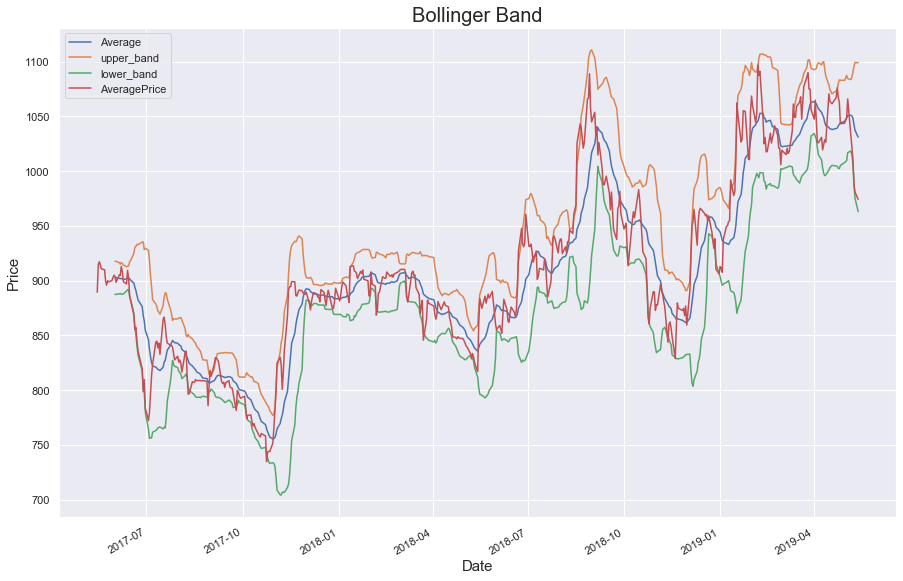

In [24]:
data[['Average','upper_band','lower_band','AveragePrice']].plot(figsize=(15,10) )
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.title('Bollinger Band',fontsize = 20)
plt.show()

In [30]:
data.head(7)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,AveragePrice,TotalTradedQuantity,...,Month,Year,Day_Perc_Change,Trend,R_Avg_21,R_Avg_34,Average,std14,upper_band,lower_band
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,LALPATHLAB,EQ,891.15,895.00,914.15,881.00,912.00,900.60,889.35,257655,...,5,2017,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-16,LALPATHLAB,EQ,900.60,910.00,925.00,895.05,909.40,910.95,914.57,104896,...,5,2017,1.149234,Positive,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-17,LALPATHLAB,EQ,910.95,913.00,925.00,909.00,912.05,911.70,917.19,72460,...,5,2017,0.082332,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-18,LALPATHLAB,EQ,911.70,908.00,919.35,903.05,906.00,909.75,914.12,37707,...,5,2017,-0.213886,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-19,LALPATHLAB,EQ,909.75,917.00,917.00,905.80,910.00,910.25,910.61,81082,...,5,2017,0.054960,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,LALPATHLAB,EQ,910.25,909.00,914.00,905.00,907.40,909.85,909.89,150085,...,5,2017,-0.043944,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23,LALPATHLAB,EQ,909.85,913.95,913.95,875.00,890.00,886.90,899.58,201776,...,5,2017,-2.522394,Negative,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.to_csv('week3.csv',index = False)

In [28]:
data.isnull().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
AveragePrice               0
TotalTradedQuantity        0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
Month                      0
Year                       0
Day_Perc_Change            0
Trend                      0
R_Avg_21                  20
R_Avg_34                  33
Average                   13
std14                     13
upper_band                13
lower_band                13
dtype: int64